In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [14]:
# Warmup 1: how do you round down any year to the 10s place?
# 2014 --> 2010
# 2003 --> 2000
# 2020 --> 2020

year = 2013
decade = year // 10 * 10
decade

2010

In [7]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt

In [8]:
matplotlib.rcParams["font.size"] = 16

In [9]:
import math
import requests

# Bar Plot Example w/ Fire Hydrants continuation

In [10]:
df = pd.read_csv("Fire_Hydrants.csv")
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


Text(0.5, 0, 'Hydrant count')

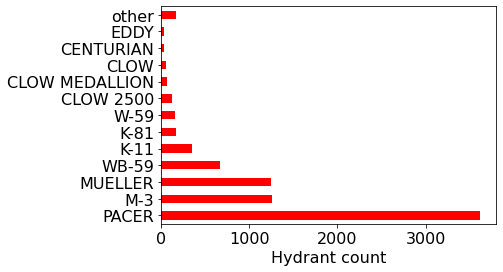

In [13]:
# We did this in the previous lecture
# Can you fill in the missing parts?

style_counts = df["Style"].str.upper().value_counts()
top12 = style_counts.iloc[:12]

# complete this line to add up all the remaining style_counts
top12["other"] = style_counts.iloc[12:].sum()  

ax = top12.plot.barh(color="r")
ax.set_xlabel("Hydrant count")

### Next Question: How many Pacers were made in each *decade*  ?


In [20]:
### Take a peek at the *Style* column data
df["Style"]

0        Pacer
1        Pacer
2        Pacer
3        Pacer
4        Pacer
         ...  
10104      NaN
10105      NaN
10106      NaN
10107      NaN
10108      NaN
Name: Style, Length: 10109, dtype: object

### I forgot the name for year...how can I check? 

In [19]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Goal: Bar Chart with the *decade* for *pacers* and *others*

In [34]:
# let's look at the "year_manufactured" for just the Pacer "Style" and put that in a series
pacer_years = df [df["Style"] == "Pacer"]["year_manufactured"]
pacer_years

0        1996.0
1        1995.0
2        1996.0
3        1995.0
4        1996.0
          ...  
10050    2017.0
10051    2017.0
10052    2017.0
10053    2017.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [35]:
# then do the same for all the other kinds of hydrants hint: does not equal Pacer
other_years = df [df["Style"] != "Pacer"]["year_manufactured"]
other_years


18       1987.0
22       1996.0
23       1996.0
71       1987.0
72       1987.0
          ...  
10104    2018.0
10105    2017.0
10106    2000.0
10107    2017.0
10108       NaN
Name: year_manufactured, Length: 6651, dtype: float64

In [36]:
# let's do some arithmetic on each series to round each year down to the previous 10
# 1987 --> 1980,   2003 --> 2000
pacer_decades = (pacer_years // 10 * 10)
pacer_decades

0        1990.0
1        1990.0
2        1990.0
3        1990.0
4        1990.0
          ...  
10050    2010.0
10051    2010.0
10052    2010.0
10053    2010.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [37]:
# now let's drop the NaN values, convert to int, and do value counts
pacer_decade_counts = (pacer_years // 10 * 10).dropna().astype(int).value_counts()
pacer_decade_counts

2000    1730
1990     846
2010     503
1980      21
1960       1
Name: year_manufactured, dtype: int64

In [38]:
# TODO:  do the same for other_years
other_decade_counts = (other_years // 10 * 10).dropna().astype(int).value_counts()
other_decade_counts

2010    1196
1980     937
1970     578
1990     431
1950     371
1960     349
2000     215
1940      68
1930       9
1900       1
Name: year_manufactured, dtype: int64

In [39]:
# Build a DataFrame from a dictionary of key, Series
plot_df = DataFrame({
    "pacer": pacer_decade_counts,
    "other": other_decade_counts,
})
# notice how pandas added NaN values when a decade only applied to one column
plot_df

,pacer,other
1900,NaN,1
1930,NaN,9
1940,NaN,68
1950,NaN,371
1960,1.0,349
1970,NaN,578
1980,21.0,937
1990,846.0,431
2000,1730.0,215
2010,503.0,1196


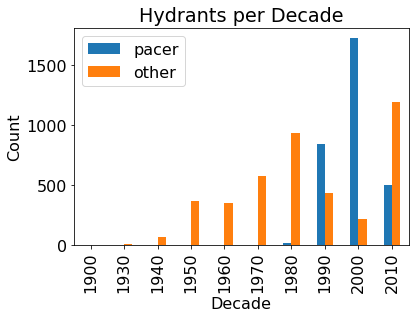

In [41]:
# make a bar plot of the Data Frame
# similar to line plots, Pandas automatically makes one bars for each column

ax = plot_df.plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Count")
ax.set_title("Hydrants per Decade")
None

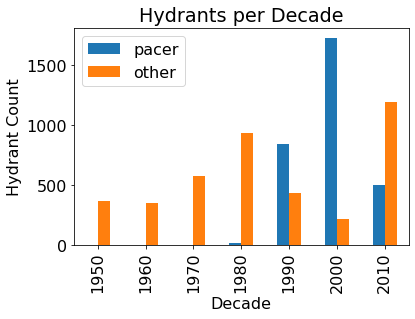

In [43]:
# Filter out decades before 1950..they are not interesting
ax = plot_df[plot_df.index >= 1950].plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
ax.set_title("Hydrants per Decade")
None

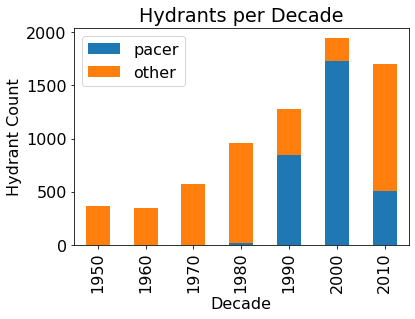

In [44]:
# make a Stacked Bar Chart!  
ax = plot_df[plot_df.index >= 1950].plot.bar(stacked=True)
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
ax.set_title("Hydrants per Decade")
None

# Rest of today's lecture
- setting axes limits
- logarithms
- multiple plots within same figure

## IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris

In [45]:
resp = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
resp.raise_for_status()

iris_fh = open("iris.data", "w")
iris_fh.write(resp.text)
iris_fh.close()

df = pd.read_csv("iris.data",
                 names = ["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
df.head()

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
# remember how to get the unique values for classes?
classes = set(df["class"])
classes

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### How do we control the *axes range* of values?
### Let us consider plotting just the data for class "Iris-virginica"
### How to extract data just for "Iris-virginica"?

In [47]:
df_sub = df[df["class"] == "Iris-virginica"]
# how do we know we got the correct number of rows?
assert(len(df_sub) == 50)
df_sub.head()

,sep-len,sep-wid,pet-len,pet-wid,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

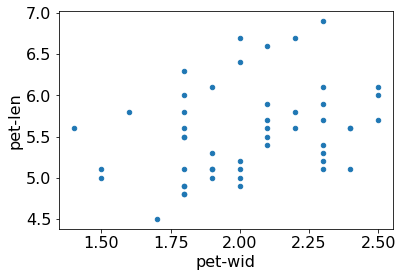

In [48]:
df_sub.plot.scatter(x = "pet-wid", y = "pet-len")

### Let's learn about *xlim* and *ylim*
- Allows us to set x-axis and y-axis limits
- Takes either a single value (LOWER-BOUND) or a tuple containing two values (LOWER-BOUND, UPPER-BOUND)
- You need to be careful about setting the UPPER-BOUND

<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

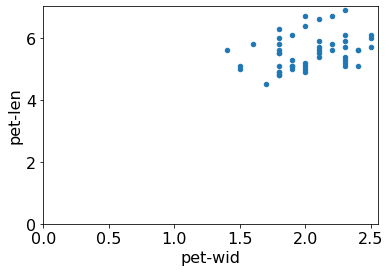

In [49]:
df_sub.plot.scatter(x = "pet-wid", y = "pet-len", xlim = 0, ylim = 0)

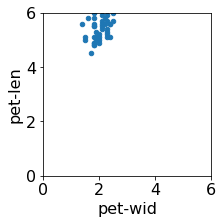

In [50]:
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len",
                    xlim = (0, 6), ylim = (0, 6),
                    figsize = (3, 3))
# what's wrong with this picture? 

In [56]:
#df_sub["pet-len"].max()
df_sub["pet-wid"].max()

2.5

In [55]:
#ax.get_ylim()
ax.get_xlim()

(0.0, 6.0)

Let's include assert statements to make sure we don't crop the plot!

AssertionError: 

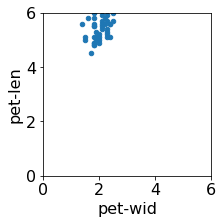

In [57]:
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len",
                     xlim = (0, 6), ylim = (0, 6),
                     figsize = (3, 3))
assert df_sub["pet-len"].max() <= ax.get_ylim()[1]

### Now let's try all 4 assert statements

- assert df_sub[ax.get_xlabel()].min() >= ax.get_xlim()[0]
- assert df_sub[ax.get_xlabel()].max() <= ax.get_xlim()[1]
- assert df_sub[ax.get_ylabel()].min() >= ax.get_ylim()[0]
- assert df_sub[ax.get_ylabel()].max() <= ax.get_ylim()[1]

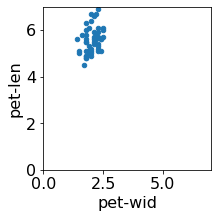

In [58]:
# note that we fixed the ylim and changed xlim to look good
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len",
                     xlim = (0, 7), ylim = (0, 7),
                     figsize = (3, 3))
assert df_sub[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert df_sub[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert df_sub[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert df_sub[ax.get_ylabel()].max() <= ax.get_ylim()[1]

## Some Graphs don't make sense when shown on a 'linear' scale

https://ourworldindata.org/grapher/population


### That's why its important to know how to graph using a Logarithmic scale


### What is a logarithm? 
- math.log(y, base)
- find an x, such that 10**x == y
    - math.log10(y)

In [64]:
math.log10(1000)
#math.log10(100)

#math.log(32,2)
#math.log(256,2)

8.0

In [65]:
# a rough estimate of log base 10
# is to count how many digits a number has

def log_approx(y):
    assert type(y) == int
    assert y >= 1
    return len(str(y))

In [66]:
log_approx(123456789)

9

In [34]:
math.log10(123456789)

8.09151497716927

In [35]:
log_approx(989898)

6

In [36]:
math.log10(989898)

5.995590446800246

Let's look at the error margin

In [67]:
errors = []
for y in range(1, 1000001):
    err = abs(log_approx(y) - math.log10(y))
    errors.append(err)
max(errors)

1.0

### Why does this matter?
- Some plots will have a wide range of data values
- A linear scale on x or y axis will not show much
- A logirithmic scale will be better to give insight


<AxesSubplot:>

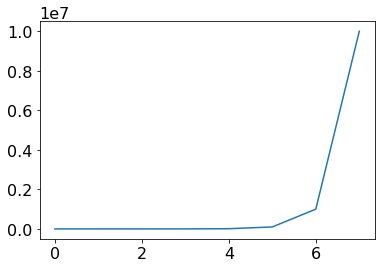

In [70]:
s = Series([10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7])
s.plot.line()

In [73]:
# source: https://www.worldometers.info/world-population/population-by-country/

pop = Series({"China":1439323776,
             "India": 1380004385,
              "Mexico": 128932753,
              "Senegal":16743927,
              "Bahrain":1701575,
              "Grenada":112523,
              "Tuvalu": 11792
             })

<AxesSubplot:>

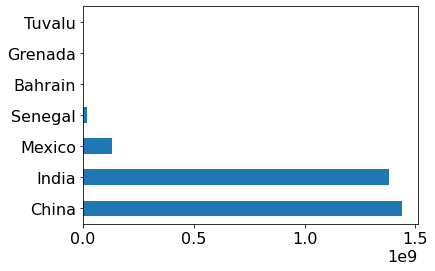

In [81]:
pop.plot.barh()

<AxesSubplot:>

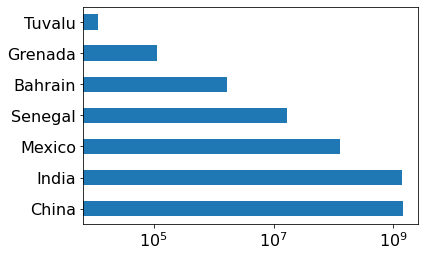

In [76]:
pop.plot.barh(logx=True)

<AxesSubplot:>

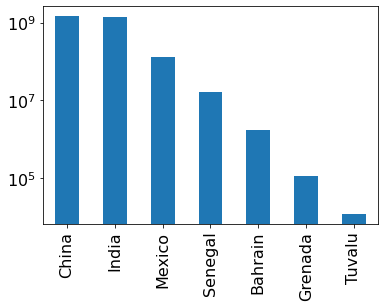

In [80]:
pop.plot.bar(logy=True)

## Final Topic: Multiple *axessubplots* in the same plot

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

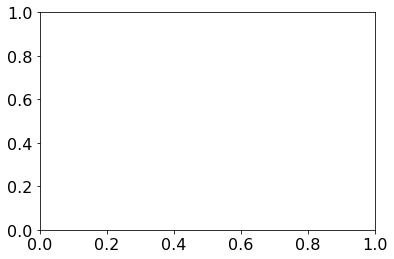

In [82]:
plt.subplots()

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

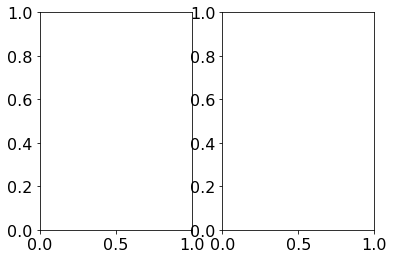

In [83]:
plt.subplots(ncols = 2)

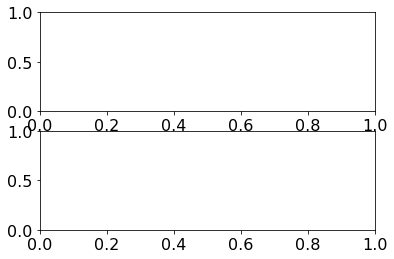

In [102]:
plt.subplots(nrows = 2)

(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

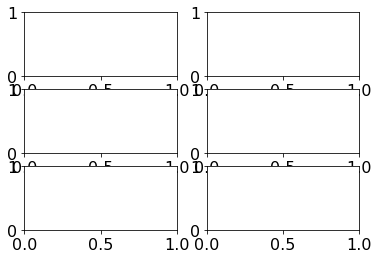

In [103]:
plt.subplots(ncols = 2, nrows = 3)


<AxesSubplot:>

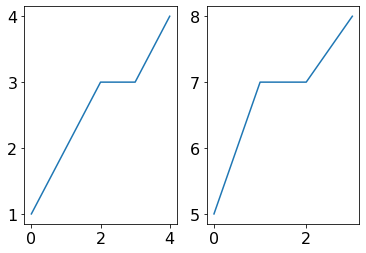

In [101]:
# Be careful when placing two graphs in the same plot
fig, axes = plt.subplots(ncols = 2)
# axes[0] # the area on the left
# axes[1] # the area on the right
Series([1, 2, 3, 3, 4]).plot.line(ax = axes[0])
Series([5, 7, 7, 8]).plot.line(ax = axes[1])

# These graphs are correct, but they give misleading information

<AxesSubplot:>

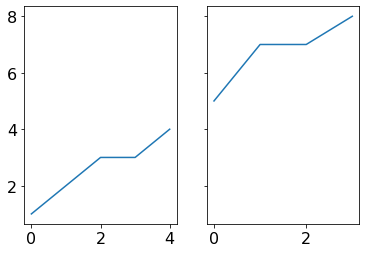

In [90]:
# We can fix this by using sharey=True
fig, axes = plt.subplots(ncols = 2, sharey = True)

# axes[0] # the area on the left
s1 = Series([1, 2, 3, 3, 4])
s1.plot.line(ax = axes[0])

# axes[1] # the area on the right
s2 = Series([5, 7, 7, 8])
s2.plot.line(ax = axes[1])



https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

<AxesSubplot:>

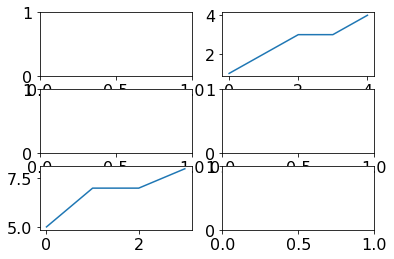

In [97]:
fig, axes = plt.subplots(ncols = 2, nrows = 3)

s1 = Series([1, 2, 3, 3, 4])
s1.plot.line(ax = axes[0][1]) # row=0, col=1

s2 = Series([5, 7, 7, 8])
s2.plot.line(ax = axes[2][0]) # row=2, col=0

AttributeError: 'str' object has no attribute 'close'